# Dinâmica day 4 - Grupo 3

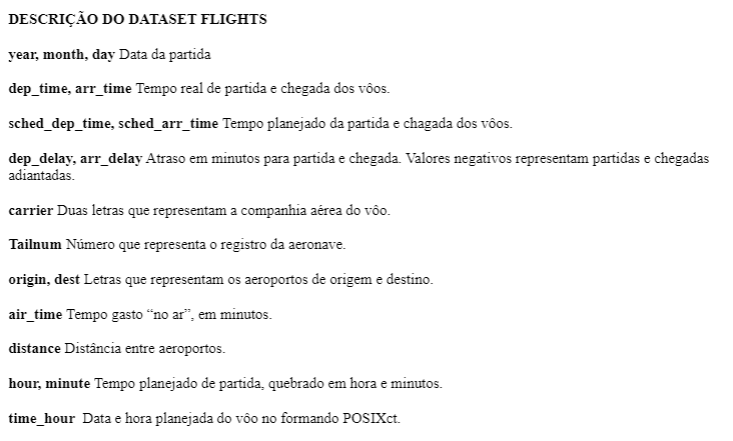

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
from google.colab import files
uploaded = files.upload() 


Saving nyflights.csv to nyflights (1).csv


In [6]:
df=pd.read_csv('nyflights.csv')

In [7]:
df.shape

(336776, 20)

In [8]:
df2=df[df['dep_delay'] > 120]

In [19]:
df2.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,152,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
218,219,2013,1,1,957.0,733,144.0,1056.0,853,123.0,UA,856,N534UA,EWR,BOS,37.0,200,7,33,2013-01-01 07:00:00
268,269,2013,1,1,1114.0,900,134.0,1447.0,1222,145.0,UA,1086,N76502,LGA,IAH,248.0,1416,9,0,2013-01-01 09:00:00
491,492,2013,1,1,1540.0,1338,122.0,2020.0,1825,115.0,B6,705,N570JB,JFK,SJU,193.0,1598,13,38,2013-01-01 13:00:00
649,650,2013,1,1,1815.0,1325,290.0,2120.0,1542,338.0,EV,4417,N17185,EWR,OMA,213.0,1134,13,25,2013-01-01 13:00:00


In [9]:
df2.describe() 

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,9723.000000,9723.0,9723.000000,9723.000000,9723.000000,9723.000000,9723.000000,9637.000000,9723.000000,9597.000000,9723.000000,9597.000000,9723.000000,9723.000000,9723.000000
mean,188874.051836,2013.0,6.300627,15.563715,1750.786691,1613.244986,186.983236,1377.411850,1772.554356,183.001355,2277.703075,138.490570,956.457678,15.860023,27.242723
std,87520.888880,0.0,3.058476,8.739641,585.010628,389.242304,74.596836,900.204935,480.403889,77.519925,1780.367852,86.352965,682.818232,3.893360,18.816225
min,152.000000,2013.0,1.000000,1.000000,1.000000,500.000000,121.000000,1.000000,1.000000,57.000000,1.000000,21.000000,80.000000,5.000000,0.000000
25%,120654.000000,2013.0,4.000000,8.000000,1544.000000,1429.000000,139.000000,221.000000,1555.000000,134.000000,603.000000,77.000000,488.000000,14.000000,10.000000
50%,203539.000000,2013.0,6.000000,16.000000,1931.000000,1705.000000,166.000000,1755.000000,1910.000000,164.000000,1710.000000,118.000000,762.000000,17.000000,29.000000
75%,258522.000000,2013.0,8.000000,23.000000,2146.000000,1916.000000,210.000000,2150.000000,2125.000000,211.000000,4118.500000,162.000000,1096.000000,19.000000,43.000000
max,336764.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,6181.000000,648.000000,4983.000000,23.000000,59.000000


In [142]:
depdelay=df2['dep_delay'].values
arrdelay=df2['arr_delay'].values

In [22]:
depdelay

array([853., 144., 134., ..., 158., 194., 154.])

In [146]:
arrdelay

array([851., 123., 145., ..., 136., 194., 130.])

In [49]:
moda1, count1 = stats.mode(depdelay)

moda1=np.float(moda1[0])

mediana1=np.median(depdelay)

media1=np.mean(depdelay)

print(f'A média de atraso (min) é de {media1:.2f}, a mediana é {mediana1:.2f} e a moda é {moda1:.2f}.')

A média de atraso (min) é de 186.98, a mediana é 166.00 e a moda é 121.00.


In [53]:
#Variância
var1 = np.var(depdelay, ddof = 1)
print(f'A variância de atraso (min²) é de {var1}.')

A variância de atraso (min²) é de 5564.68795180078.


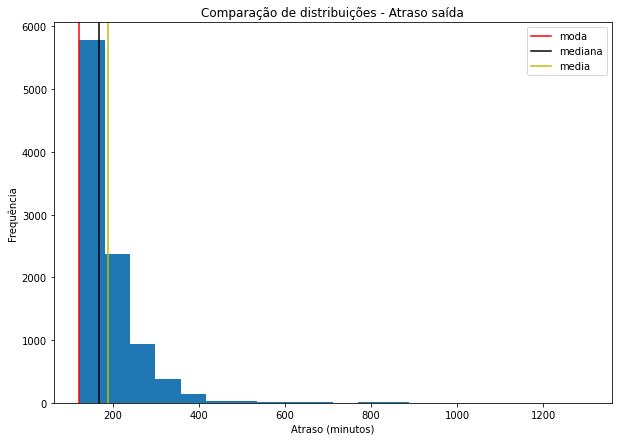

In [46]:
fig = plt.figure(figsize=(10,7))

h=plt.hist(depdelay,bins=20)

plt.title('Comparação de distribuições - Atraso saída')

plt.xlabel('Atraso (minutos)')

plt.ylabel('Frequência')

#Define as métricas
xCoords = pd.Series([moda1, mediana1, media1], ['moda', 'mediana', 'media'])

# Define a cor das linhas
colors = ['r', 'k', 'y']

# Plota linhas verticais
for xc,xn,c in zip(xCoords, xCoords.index, colors):
    plt.axvline(x = xc, label = xn, c = c)

#Add legenda
plt.legend()

Text(0.5, 1.0, 'Gráfico Box-Plot dos Voos Atrasados')

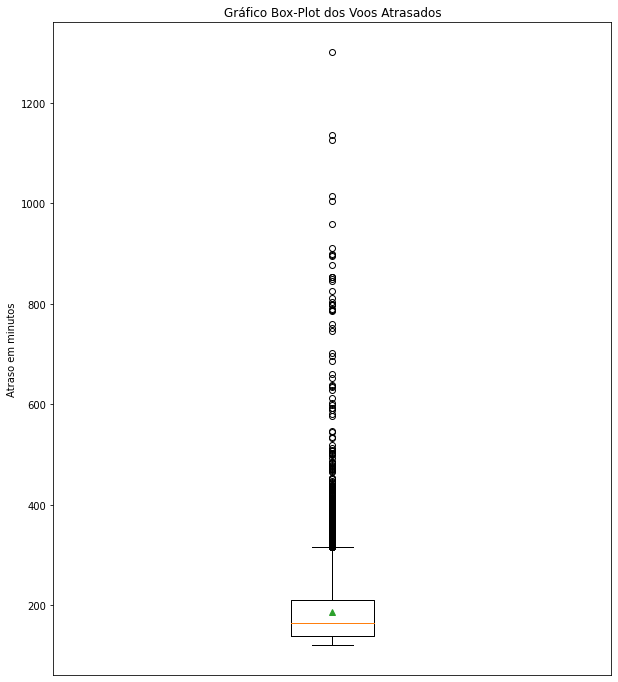

In [144]:
fig = plt.figure(figsize=(10,12))

plt.boxplot([depdelay],showmeans=True)

plt.ylabel('Atraso em minutos')

# Remove o valor do eixo x
plt.xticks([1], [''])

# Remove o tick do eixo x
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

plt.title('Gráfico Box-Plot dos Voos Atrasados', loc = 'center')


In [104]:
df3=df[df['dep_delay'] > 5]
df3.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
25,26,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00
26,27,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00
31,32,2013,1,1,623.0,610,13.0,920.0,915,5.0,AA,1837,N3EMAA,LGA,MIA,153.0,1096,6,10,2013-01-01 06:00:00
41,42,2013,1,1,632.0,608,24.0,740.0,728,12.0,EV,4144,N13553,EWR,IAD,52.0,212,6,8,2013-01-01 06:00:00
47,48,2013,1,1,644.0,636,8.0,931.0,940,-9.0,UA,1701,N75435,EWR,FLL,151.0,1065,6,36,2013-01-01 06:00:00


In [75]:
df4=df3.groupby(['dest'],as_index=False).count().sort_values(by='dep_delay',ascending=False)
df4.head()

,dest,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,air_time,distance,hour,minute,time_hour
67,ORD,4975,4975,4975,4975,4975,4975,4975,4950,4975,4929,4975,4975,4975,4975,4929,4975,4975,4975,4975
4,ATL,4687,4687,4687,4687,4687,4687,4687,4671,4687,4653,4687,4687,4687,4687,4653,4687,4687,4687,4687
49,LAX,4442,4442,4442,4442,4442,4442,4442,4434,4442,4423,4442,4442,4442,4442,4423,4442,4442,4442,4442
52,MCO,4083,4083,4083,4083,4083,4083,4083,4081,4083,4078,4083,4083,4083,4083,4078,4083,4083,4083,4083
88,SFO,4078,4078,4078,4078,4078,4078,4078,4068,4078,4044,4078,4078,4078,4078,4044,4078,4078,4078,4078


In [82]:
df4[['dest','dep_delay']].head(5)

,dest,dep_delay
67,ORD,4975
4,ATL,4687
49,LAX,4442
52,MCO,4083
88,SFO,4078


In [80]:
df[df['dep_delay'] > 5]['dest'].value_counts().reset_index().sort_values('dest', ascending=False).head(5) 

,index,dest
0,ORD,4975
1,ATL,4687
2,LAX,4442
3,MCO,4083
4,SFO,4078


In [86]:
destinos=df4['dest'].head().tolist()
destinos

['ORD', 'ATL', 'LAX', 'MCO', 'SFO']

In [87]:
df3.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
25,26,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00
26,27,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00
31,32,2013,1,1,623.0,610,13.0,920.0,915,5.0,AA,1837,N3EMAA,LGA,MIA,153.0,1096,6,10,2013-01-01 06:00:00
41,42,2013,1,1,632.0,608,24.0,740.0,728,12.0,EV,4144,N13553,EWR,IAD,52.0,212,6,8,2013-01-01 06:00:00
47,48,2013,1,1,644.0,636,8.0,931.0,940,-9.0,UA,1701,N75435,EWR,FLL,151.0,1065,6,36,2013-01-01 06:00:00


In [102]:
destinos

['ORD', 'ATL', 'LAX', 'MCO', 'SFO']

In [112]:
df5=df3[df3.dest.isin(destinos)]
df5.head(5)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
25,26,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00
26,27,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00
70,71,2013,1,1,709.0,700,9.0,852.0,832,20.0,UA,1092,N26226,LGA,ORD,135.0,733,7,0,2013-01-01 07:00:00
85,86,2013,1,1,732.0,645,47.0,1011.0,941,30.0,UA,1111,N37456,EWR,MCO,145.0,937,6,45,2013-01-01 06:00:00
91,92,2013,1,1,743.0,730,13.0,1107.0,1100,7.0,AA,33,N338AA,JFK,LAX,358.0,2475,7,30,2013-01-01 07:00:00


In [124]:
# pd.set_option('float_format', '{:.2f}'.format) 
pd.reset_option('^display.', silent=True)

In [149]:
df6=df5.groupby(['dest'],as_index=False).sum().sort_values(by='dep_delay',ascending=False)

df6['velocidade_média']=(df6['distance']/df6['air_time']).round(3)

df6=df6[['dest','velocidade_média']].head(5)
df6

,dest,velocidade_média
3,ORD,6.343
0,ATL,6.766
4,SFO,7.536
2,MCO,7.023
1,LAX,7.604


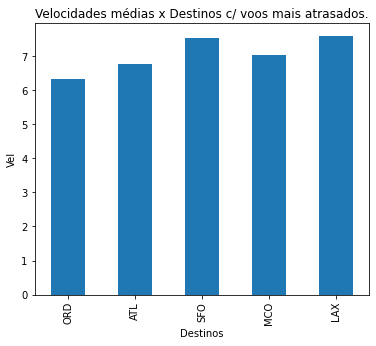

In [194]:

graf=df6.plot(x='dest',y='velocidade_média',kind='bar',title='Velocidades médias x Destinos c/ voos mais atrasados.',xlabel='Destinos',ylabel='Vel',legend=False,figsize=(6,5))


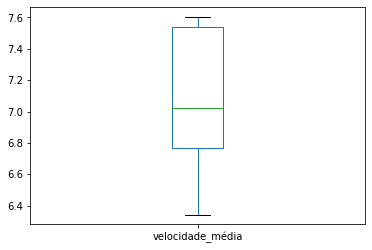

In [161]:
df6.plot.box()